# About the Data

- Dataset link and dictionary description: https://www.openml.org/search?type=data&sort=runs&id=43430&status=active
- The dataset was originally published by [Skybox](https://skybox.gg/) as part of their CS:GO AI Challenge, running from Spring to Fall 2020. The data set consists of 700 demos from high level tournament play in 2019 and 2020. Warmup rounds and restarts have been filtered, and for the remaining live rounds a round snapshot have been recorded every 20 seconds until the round is decided.
- All snapshots are i.i.d (independent and identically distributed) in the sense that they each describe the state of a round and can therefore be treated individually.

# TODO LIST[✅]
1. Predict the round winner -> [ ]
2. Questions to Answer:
    2. What types of machine learning models perform best on this dataset? [ ]
    2. Which different factors are more important on specific maps? [ ]
    2. Which features are most indicative of which teams wins the round? [ ]
    2. How often does the team with most money win? [ ]
    2. Are some weapons favourable to others? [ ]
    2. What attributes should your team have to win? Health, Armor or Money? [ ]


## LIBRARIES being used on this project

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Extract, Transform, Load (ETL)

If within the dataset, there's "@"/"%"/"" than skip, if not, append into data.

In [27]:
data = []

with open(r"../data/dataset", "r") as x: #'r'-read mode/ 'w'-write/ 'rb'- read binary/ 'a' - append
    for line in x.read().split("\n"):
        if line.startswith("@") or line.startswith("%") or line == "":
            continue
        data.append(line)

Now, to gather the attributes (columns), we look for the second word.


<img alt="variables_example" height="400" src="images/attributes.png" width="400"/>

In [28]:
columns = []

with open(r"../data/dataset", "r") as x:
    for line in x.read().split("\n"):
        if line.startswith("@ATTRIBUTE"):
            columns.append(line.split(" ")[1])

Writing everything into a .csv file and saving in the data folder.

In [29]:
with open("../data/df.csv", "w") as x:
    x.write(",".join(columns))
    x.write("\n")
    x.write("\n".join(data))

read the dataframe with pandas.

In [30]:
df = pd.read_csv("../data/df.csv")

# Data Preprocessing

## Exploratory data analysis (EDA)

In [31]:
df.head(4)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [32]:
df.tail(4)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T
122409,74.93,11.0,15.0,de_train,False,375.0,479.0,395.0,466.0,1100.0,...,3.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,T


In [33]:
df.shape

(122410, 97)

In [34]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

There's no null value in the DataFrame

In [36]:
df.isnull().sum()

time_left                    0
ct_score                     0
t_score                      0
map                          0
bomb_planted                 0
                            ..
ct_grenade_molotovgrenade    0
t_grenade_molotovgrenade     0
ct_grenade_decoygrenade      0
t_grenade_decoygrenade       0
round_winner                 0
Length: 97, dtype: int64

## Encoding Process

Creating a new feature where all the 'terrorist-side' round win will be a numerical value instead of categorical (__T WIN = 1__).

In [37]:
df['t_win'] = df.round_winner.astype("category").cat.codes

`astype("category")`converts the string values to a pandas category dtype, which is a more memory-efficient way to handle categorical data and then `.cat.codes` converts the categorical labels into integer codes.

I will use __One-hot Encoding__ for the map variables. `pd.get_dummies` Is responsible for convert categorical data into binary (0/1) columns.

In [38]:
df['map'].unique()

array(['de_dust2', 'de_mirage', 'de_nuke', 'de_inferno', 'de_overpass',
       'de_vertigo', 'de_train', 'de_cache'], dtype=object)

In [39]:
df = pd.get_dummies(df, columns = ['map'], prefix = 'map')

## Correlation Tests
- Using all the features of the data, witch one is correlating the most with my target variable (`t_win`)?

In [40]:
df.drop('round_winner', axis=1, inplace=True)

Dropping 'round_winner' variable, because the data already have `t_win`. 👆

First, showing the correlations as text and applying the absolute functions, because we want to look at all strong correlations, doesn't matter if it's positive or negative.

In [41]:
correlations = df.corr()
print(correlations['t_win'].apply(abs).sort_values(ascending = False).iloc[:40])

t_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
bomb_planted                    0.187101
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps   

Selecting columns with a correlation above __0.1__ to reduce the number of features, thereby decreasing the computational resources required for future machine learning tasks.

In [42]:
selected_columns = []

for col in df.columns:
    if abs(correlations[col]['t_win']) > 0.10:
        selected_columns.append(col)

df_selected = df[selected_columns]

Heatmap without absolute values

<Axes: >

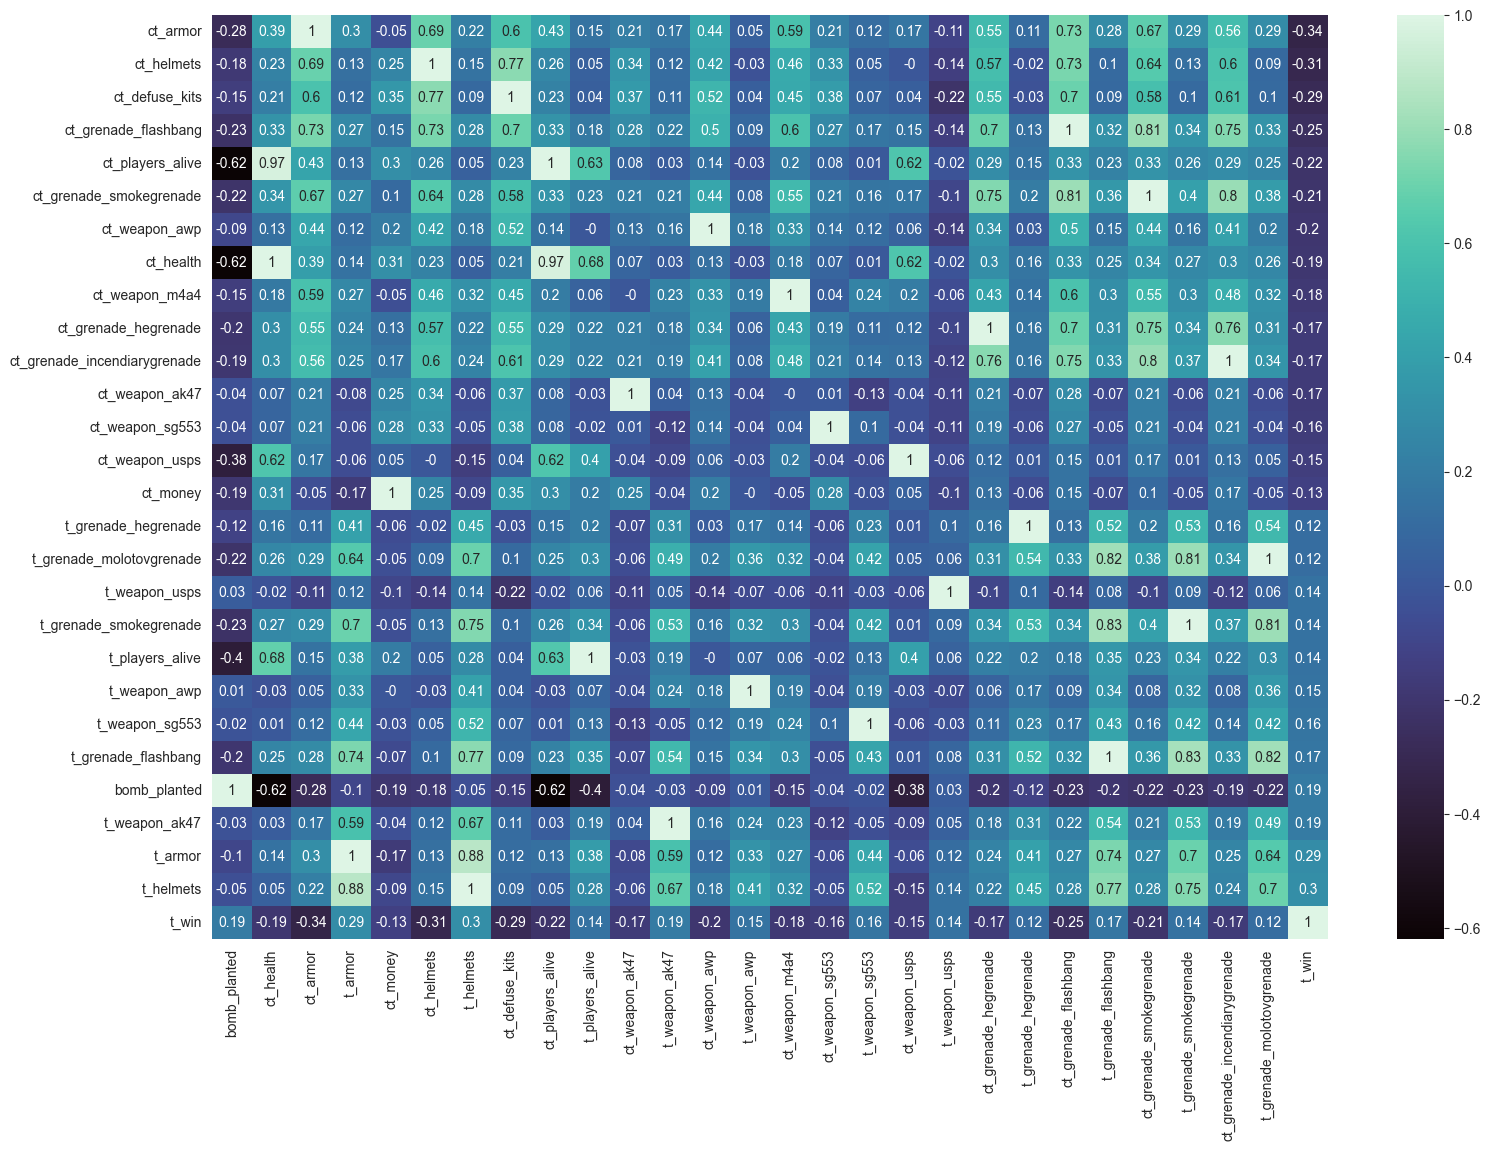

In [43]:
plt.figure(figsize = (18,12))
sns.heatmap(round(df_selected.corr().sort_values(by = 't_win'),2), annot=True, cmap = 'mako')

Absolute values applied

<Axes: >

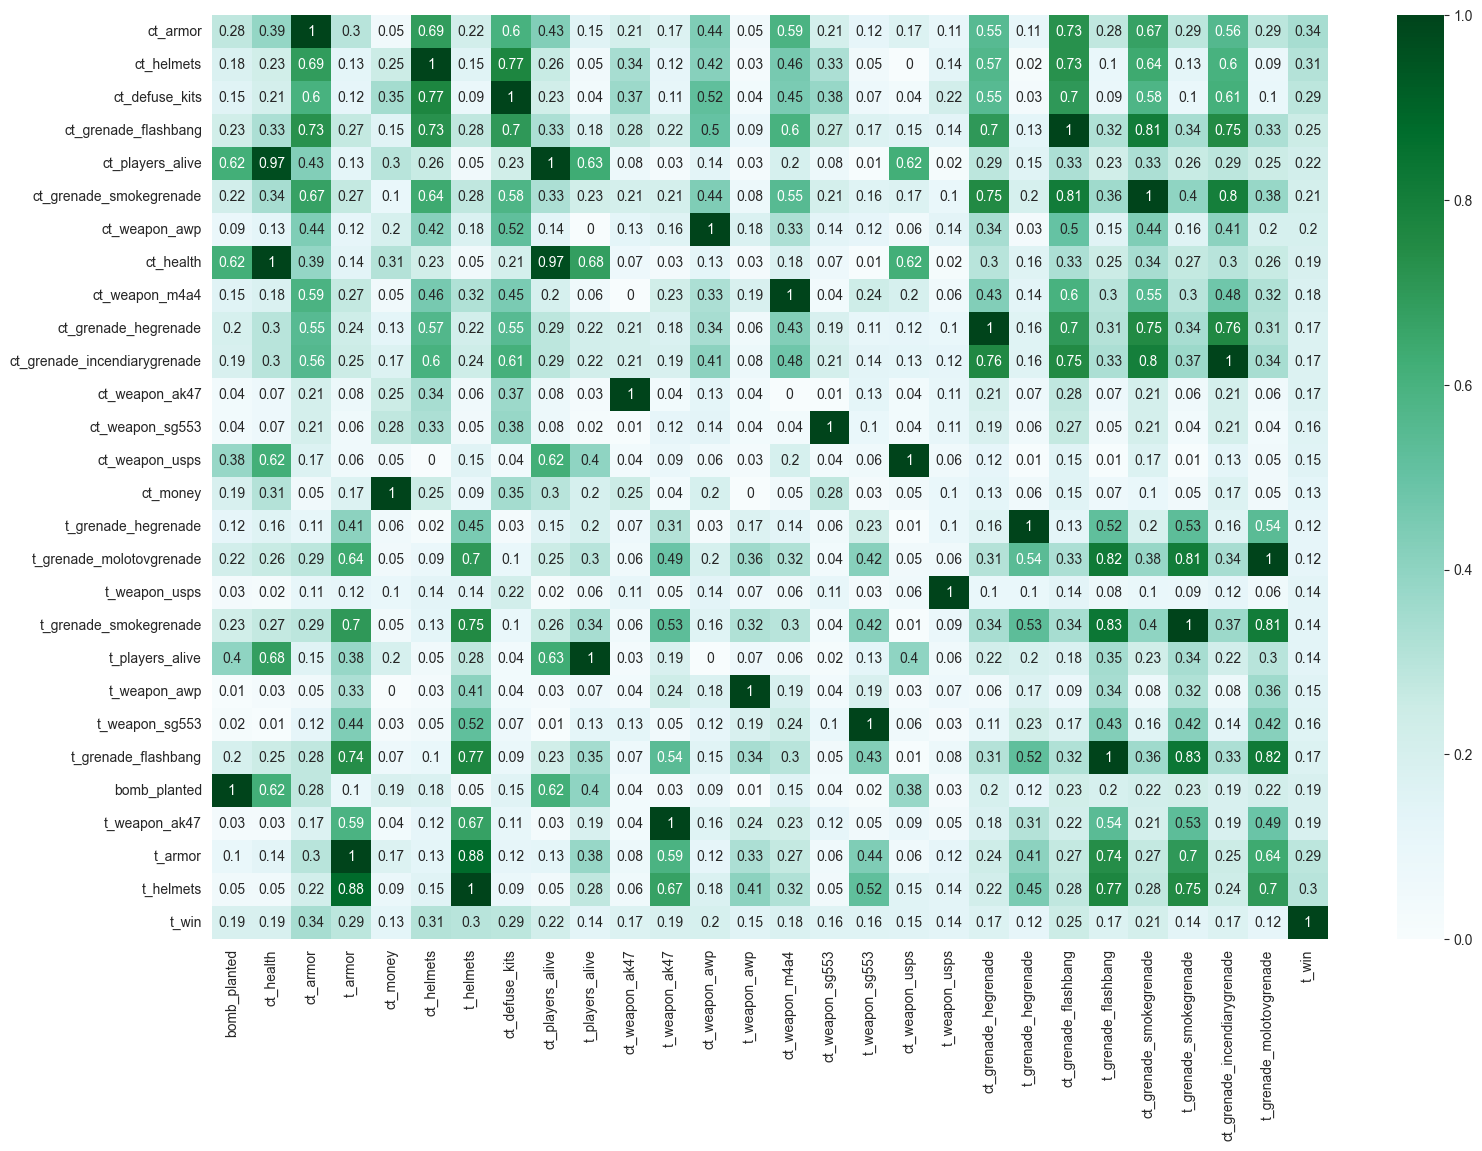

In [44]:

plt.figure(figsize = (18,12))
sns.heatmap(round(abs(df_selected.corr().sort_values(by = 't_win')),2), annot=True, cmap = 'BuGn')

___
# Machine learning

## Data Transformation and Scaling
- Checking whether the selected features are distributed in a way that won't introduce bias into the machine learning models.

array([[<Axes: title={'center': 'ct_health'}>,
        <Axes: title={'center': 'ct_armor'}>,
        <Axes: title={'center': 't_armor'}>,
        <Axes: title={'center': 'ct_money'}>,
        <Axes: title={'center': 'ct_helmets'}>],
       [<Axes: title={'center': 't_helmets'}>,
        <Axes: title={'center': 'ct_defuse_kits'}>,
        <Axes: title={'center': 'ct_players_alive'}>,
        <Axes: title={'center': 't_players_alive'}>,
        <Axes: title={'center': 'ct_weapon_ak47'}>],
       [<Axes: title={'center': 't_weapon_ak47'}>,
        <Axes: title={'center': 'ct_weapon_awp'}>,
        <Axes: title={'center': 't_weapon_awp'}>,
        <Axes: title={'center': 'ct_weapon_m4a4'}>,
        <Axes: title={'center': 'ct_weapon_sg553'}>],
       [<Axes: title={'center': 't_weapon_sg553'}>,
        <Axes: title={'center': 'ct_weapon_usps'}>,
        <Axes: title={'center': 't_weapon_usps'}>,
        <Axes: title={'center': 'ct_grenade_hegrenade'}>,
        <Axes: title={'center': 't_gr

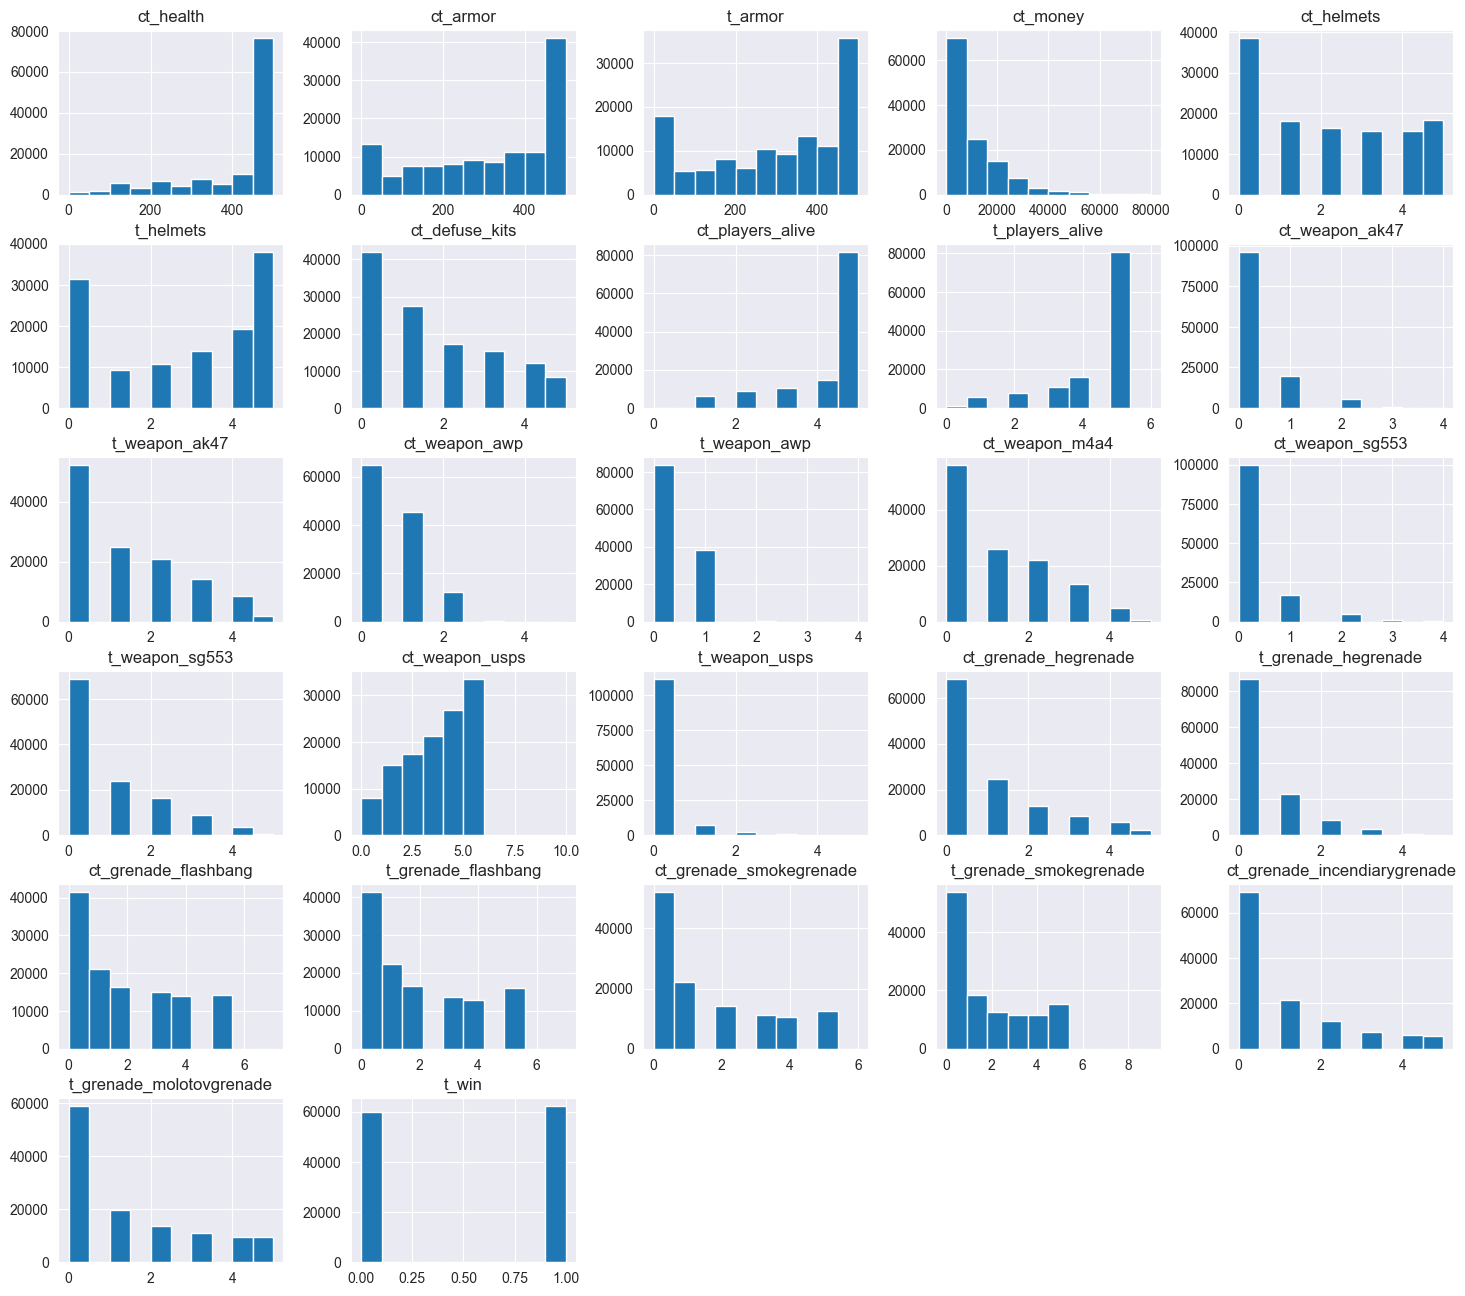

In [45]:
df_selected.hist(figsize = (18,16))

### 60/40 SPLIT

In [46]:
X = df_selected.drop(["t_win"], axis = 1)
Y = df_selected["t_win"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=8)

### Scaler
- Using standard scaler of sklearn.

In [47]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Multiple Linear Regression Model (MLR)

In [48]:
MLR = LinearRegression()
MLR.fit(X_train_scaled, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [49]:
Y_predict = MLR.predict(X_test_scaled)

mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
r2 = r2_score(Y_test, Y_predict)

print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 coefficient: ', r2)

Mean Absolute Error:  0.35285679017136334
Mean Squared Error:  0.1665608761365419
R2 coefficient:  0.3336210768540031


In [50]:
MLR.score(X_test_scaled, Y_test)

0.3336210768540031

### 90/10 SPLIT

In [51]:
X = df_selected.drop(["t_win"], axis=1)
Y = df_selected["t_win"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=8)

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MLR = LinearRegression()
MLR.fit(X_train_scaled, Y_train)
Y_predict = MLR.predict(X_test_scaled)

mae = mean_absolute_error(Y_test, Y_predict)
mse = mean_squared_error(Y_test, Y_predict)
r2 = r2_score(Y_test, Y_predict)

print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('R2 coefficient: ', r2)

Mean Absolute Error:  0.3537490796004864
Mean Squared Error:  0.16682734174567515
R2 coefficient:  0.3322256886861734


In [53]:
MLR.score(X_test_scaled, Y_test)

0.3322256886861734

### Multiple Linear Regression Model __Report__:

- I tested the Multiple Linear Regression (MLR) model on my dataset using the selected columns and two different train-test splits: **60/40** and **90/10**.
- The **60/40 split** achieved an R² coefficient of **0.3336**, while the **90/10 split** resulted in **0.3322**.
- Although the difference is small (only **0.0014**), the 60/40 split showed slightly better precision.
- I still need to drop some columns and perform further tests to evaluate how feature selection affects the model’s performance.

## Random Forest (RF)